In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CriticalZoom_2flavor import order_checker

In [2]:
def critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0):
    order=2
    iterationNumber=0

    #create a list to store the sigma values, temperatures, and order of the transition
    sigma_list=[]
    temps_list=[]


    #iteratively run the order_checker function until the transition is first order, or until the bounds are too small
    while order==2 and iterationNumber<6 and tmin<tmax and np.abs(maxsigma-minsigma)>2:
        tmin,tmax,minsigma,maxsigma,order,temps,truesigma,Tc=order_checker(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)
        iterationNumber=iterationNumber+1
        print("Iteration number ", iterationNumber)
        if tmax<tmin:
            print("TEMPERATURE BOUNDS REVERSED!!!")
        sigma_list.append(truesigma)
        temps_list.append(temps)

    return order, iterationNumber, sigma_list,temps_list,Tc
    


In [14]:
tmin=70
tmax=120
numtemp=25



#light quark mass
ml=0.1

#chemical potential
mu=0

lambda1= 7 #parameter for mixing between dilaton and chiral field

minsigma=0
maxsigma=300

a0=0. 

order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)




/usr/local/lib64/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib64/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib64/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib64/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/l

get_all_sigmas_parallel took 9.934sec
Crossover or 2nd order
Pseudo-Critical temperature is between 107.5 115.83333333333334
Iteration number  1
get_all_sigmas_parallel took 2.864sec
Crossover or 2nd order
Pseudo-Critical temperature is between 112.36111111111111 113.75
Iteration number  2
get_all_sigmas_parallel took 1.818sec
Crossover or 2nd order
Pseudo-Critical temperature is between 113.05555555555556 113.28703703703704
Iteration number  3
get_all_sigmas_parallel took 657.25ms
Crossover or 2nd order
Pseudo-Critical temperature is between 113.05555555555556 113.07484567901234
Iteration number  4
get_all_sigmas_parallel took 150.91ms
Crossover or 2nd order
Pseudo-Critical temperature is between 113.05796682098766 113.06118184156378
Iteration number  5


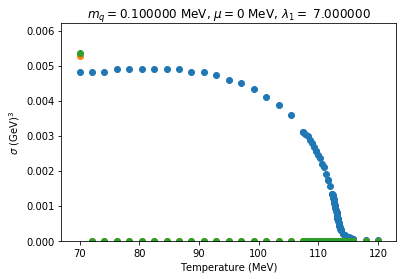

In [23]:
#plot all the sigma values for each iteration
#get the standard colors for matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#find the index of when sigma_list[0][:,0] has its first zero value
#this is the index of the first temperature where the sigma value is zero

max_index=np.argmax(sigma_list[0][:,0]==0)
#find the value of the temperature at this index
max_temp=temps_list[0][max_index]



for i in range(len(sigma_list)):
    plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV)$^3$")
#set the x range
#plt.xlim(temps_list[0][0],max_temp)
plt.ylim([np.amin((1.05*sigma_list[0]/1000))**3,np.amax((1.05*sigma_list[0]/1000))**3])
plt.title(r'$m_q=%f$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
#plt.savefig("plots/sigma_T_mq%i_mu%i_lambda1%f.png" %(ml,mu,lambda1))
plt.show()
    

In [9]:

np.amax(np.abs(sigma_list[0][:,0]))

170.0

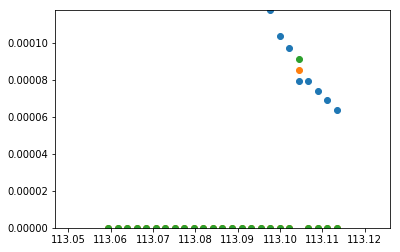

In [10]:
i=-2
plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])
plt.ylim([0,np.amax((sigma_list[-1][:,0]/1000)**3)])
plt.show()

In [11]:
sigma_list[-1]

array([[49.,  0.,  0.],
       [49.,  0.,  0.],
       [49.,  0.,  0.],
       [49.,  0.,  0.],
       [47., 48., 49.],
       [47.,  0.,  0.],
       [47.,  0.,  0.],
       [47.,  0.,  0.],
       [47.,  0.,  0.],
       [47.,  0.,  0.],
       [46.,  0.,  0.],
       [46.,  0.,  0.],
       [46.,  0.,  0.],
       [46.,  0.,  0.],
       [46.,  0.,  0.],
       [46.,  0.,  0.],
       [45.,  0.,  0.],
       [45.,  0.,  0.],
       [43., 44., 45.],
       [43., 44., 45.],
       [43.,  0.,  0.],
       [43.,  0.,  0.],
       [43.,  0.,  0.],
       [43.,  0.,  0.],
       [43.,  0.,  0.]])

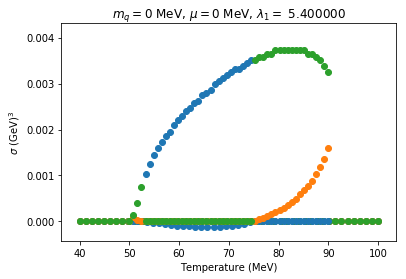

In [30]:
#plot all the sigma values for each iteration
#get the standard colors for matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#find the index of when sigma_list[0][:,0] has its first zero value
#this is the index of the first temperature where the sigma value is zero

max_index=np.argmax(sigma_list[0][:,0]==0)
#find the value of the temperature at this index
max_temp=temps_list[0][max_index]



for i in range(len(sigma_list)):
    plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])    
for i in range(len(sigma_old)):
    plt.scatter(temps_old[i],(sigma_old[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_old[i],(sigma_old[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_old[i],(sigma_old[i][:,2]/1000)**3,color=colors[2])
plt.xlabel("Temperature (MeV)")

plt.ylabel("$\sigma$ (GeV)$^3$")
#set the x range
#plt.xlim(temps_list[0][0],max_temp)
plt.ylim([np.amin((1.5*sigma_list[0]/1000))**3,np.amax((1.05*sigma_old[0]/1000))**3])
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.savefig("plots/sigma_T_mq_{}_mu_{:.2f}_lambda_{:.2f}.png".format(ml, mu, round(lambda1, 2)))
plt.show()
    

In [10]:
sigma_old

[array([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [190., 191., 192.],
        [  0.,   0.,   0.],
        [191., 192., 193.],
        [192., 193., 194.],
        [193., 194., 195.],
        [193.,   0.,   0.],
        [194.,   0.,   0.],
        [195.,   0.,   0.],
        [195.,   0.,   0.],
        [196.,   0.,   0.],
        [197.,   0.,   0.],
        [197.,   0.,   0.],
        [198.,   0.,   0.],
        [198.,   0.,   0.],
        [199.,   0.,   0.],
        [199.,   0.,   0.],
        [200.,   0.,   0.],
        [200.,   0.,   0.],
        [201.,   0.,   0.],
        [201.,   0.,   0.],
        [201.,   0.,   0.],
        [201.,   0.,   0.],
        [201.,   0.,   0.],
        [202.,   0.,   0.],
        [201.,   0.,

In [17]:
temps_old=temps_list
sigma_old=sigma_list

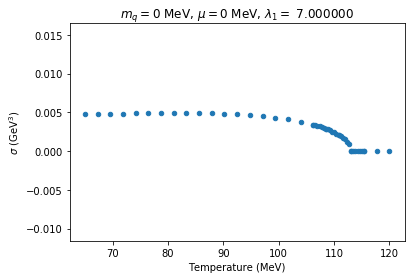

In [17]:
#load the data frame from the pickle file
df2=pd.read_pickle('data/chiral_transition_2flavor_mq%i_mu%i_lambda_%f_order%i.pkl' %(ml,mu,lambda1,order))

#plot the data frame
df2.plot.scatter(x='temps',y=['sigma1'])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV$^3$)")
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()

In [15]:
# Save the data as a pandas dataframe
df_all_list = []
for i in range(len(sigma_list)):
    df=pd.DataFrame()
    df['temps']=temps_list[i]
    df['sigma1']=(sigma_list[i][:,0]/1000)**3   
    df['sigma2']=(sigma_list[i][:,1]/1000)**3
    df['sigma3']=(sigma_list[i][:,2]/1000)**3
    df['order']=order
    df['ml']=ml
    df['mu']=mu
    df['lambda1']=lambda1
    df['a0']=a0
    df['Tc']=Tc
    df_all_list.append(df)

# Use pandas concat here
df_all = pd.concat(df_all_list)

#pickle the data frame
df_all.to_pickle('data/chiral_transition_2flavor_mq%i_mu%i_lambda_%f_order%i.pkl' %(ml,mu,lambda1,order))
print('chiral_transition_2flavor_mq%i_mu%i_lambda_%f_order%i.pkl' %(ml,mu,lambda1,order))

chiral_transition_2flavor_mq0_mu0_lambda_7.000000_order1.pkl
